![](https://mandayahospitalgroup.com/wp-content/uploads/2024/05/diabetes.jpg)

In [ ]:
# Rizki Khaerul Padli     (22.11.5301)
# Trisna Julianto         (19.11.3222)
# Sang Arya Ananda        (24.21.1584)
# Vita Suci Hidayah       (21.11.4527)
# Ade Kurniawan Kristian  (22.11.5354)
# Muhammad Thoriq Mumtaz  (22.11.5065)
# Mufqi Ammar Fauzan      (22.11.5333)

# **Tujuan Utama**

Tujuan Penelitian ini dilakukan untuk Memprediksi apakah seseorang menderita diabetes ketika karakteristiknya ditentukan untuk mengembangkan model pembelajaran mesin yang mampu belajar dari model pembelajaran mesin.

# **Dataset Story**

- Kumpulan data ini merupakan bagian dari kumpulan data lebih besar yang disimpan di Institut Nasional Penyakit Diabetes-Pencernaan-Ginjal di AS. Di AS
  Wanita Indian Pima berusia 21 tahun ke atas tinggal di Phoenix, kota terbesar ke-5 di Negara Bagian Arizona
  adalah data yang digunakan untuk penelitian diabetes.
  
- Variabel target ditentukan sebagai "hasil", dimana 1 menunjukkan hasil tes diabetes positif dan 0 menunjukkan hasil negatif.

- **Pregnancies:** Jumlah kehamilan

- **Glucose:** Konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral

- **Blood Pressure:** Tekanan Darah (tekanan darah kecil) (mm Hg)

- **SkinThickness:** Ketebalan Kulit

- **Insulin:** Insulin serum 2 jam (mu U/ml)

- **DiabetesPedigreeFunction:** Fungsi (konsentrasi glukosa plasma 2 jam dalam tes toleransi glukosa oral)

- **BMI:** Indeks massa tubuh

- **Age:** Usia (tahun)

- **Outcome:** Menderita penyakit (1) atau tidak (0)

# **1. Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go

from pyspark.sql import SparkSession
from pyspark.sql import DataFrame
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action="ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **2. Menyesuaikan Pengaturan Kolom dan Baris**

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# **3. Load Dataset**

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

data frame info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Periksa nilai null
print("\nJumlah nilai null di setiap kolom:\n")
print(df.isnull().sum())


Jumlah nilai null di setiap kolom:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


statistik deskriptif

In [ ]:
df.describe().T

count    mean     std    min    25%     50%     75%     max
Pregnancies              768.000   3.845   3.370  0.000  1.000   3.000   6.000  17.000
Glucose                  768.000 120.895  31.973  0.000 99.000 117.000 140.250 199.000
BloodPressure            768.000  69.105  19.356  0.000 62.000  72.000  80.000 122.000
SkinThickness            768.000  20.536  15.952  0.000  0.000  23.000  32.000  99.000
Insulin                  768.000  79.799 115.244  0.000  0.000  30.500 127.250 846.000
BMI                      768.000  31.993   7.884  0.000 27.300  32.000  36.600  67.100
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.244   0.372   0.626   2.420
Age                      768.000  33.241  11.760 21.000 24.000  29.000  41.000  81.000
Outcome                  768.000   0.349   0.477  0.000  0.000   0.000   1.000   1.000

In [ ]:
df.groupby('Outcome').size().reset_index(name='count')

Outcome  count
0        0    500
1        1    268

# **4. Data Cleaning,Normalization & EDA**

Data Cleaning

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Menghapus nilai-nilai yang tidak sesuai atau 0 pada kolom tertentu (kecuali 'Pregnancies' dan 'Outcome')
def clean_data(dataframe):
    columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
    for col in columns_to_clean:
        median_value = dataframe[col].replace(0, pd.NA).median()  # Mengganti 0 dengan NA, lalu menghitung median
        dataframe[col].replace(0, median_value, inplace=True)  # Mengganti nilai 0 dengan median
    return dataframe

Normalisasi

In [ ]:
# Normalisasi data menggunakan Min-Max Scaler
def normalize_data(dataframe):
    scaler = MinMaxScaler()
    columns_to_scale = dataframe.columns.difference(['Outcome'])  # Jangan normalisasi kolom target
    dataframe[columns_to_scale] = scaler.fit_transform(dataframe[columns_to_scale])
    return dataframe

# Cleaning data
df_cleaned = clean_data(df)

# Normalisasi data
df_normalized = normalize_data(df_cleaned)

# Menampilkan 5 baris pertama hasil
print(df_normalized.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   

    Age  Outcome  
0 0.483        1  
1 0.167        0  
2 0.183        1  
3 0.000        0  
4 0.200        1  


In [ ]:
# melakukan eksplorasi awal (exploratory data analysis / EDA) pada DataFrame dan memberikan informasi penting tentang data dalam format yang mudah dibaca

def check_df(dataframe, head=5):
    print("=" * 50)
    print("Shape".center(50))
    print("=" * 50)
    print(dataframe.shape) # Menghasilkan tuple yang menunjukkan jumlah baris dan kolom

    print("=" * 50)
    print("Data Types".center(50))
    print("=" * 50)
    print(dataframe.dtypes) # Menghasilkan seri yang berisi tipe data untuk setiap kolom.

    print("=" * 50)
    print("First Rows (Head)".center(50))
    print("=" * 50)
    print(dataframe.head(head)) # Menampilkan sejumlah baris pertama dari DataFrame (default adalah 5).

    print("=" * 50)
    print("Last Rows (Tail)".center(50))
    print("=" * 50)
    print(dataframe.tail(head))

    print("=" * 50)
    print("Missing Values (NA)".center(50))
    print("=" * 50)
    print(dataframe.isnull().sum()) # Menghasilkan jumlah nilai kosong di setiap kolom.

    print("=" * 50)
    print("Quantiles".center(50))
    print("=" * 50)
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T) # Menghitung kuantil untuk persentil yang berbeda (0%, 5%, 50%, 95%, 99%, 100%).

# Menggunakan fungsi
check_df(df)


                      Shape                       
(768, 9)
                    Data Types                    
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                       int64
dtype: object
                First Rows (Head)                 
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0

# **5. Cek Variabel Numerik dan Kategorikal**

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Mengembalikan nama-nama kolom kategorikal, numerik, dan kategorikal tetapi cardinal dalam dataset.

    Parameters:
    ----------
    dataframe : pandas.DataFrame
        DataFrame yang akan dievaluasi.
    cat_th : int, optional
        Ambang batas untuk menentukan kolom numerik sebagai kategorikal.
    car_th : int, optional
        Ambang batas untuk menentukan kolom kategorikal sebagai cardinal.

    Returns:
    -------
    cat_cols : list
        Daftar kolom kategorikal.
    num_cols : list
        Daftar kolom numerik.
    cat_but_car : list
        Daftar kolom kategorikal tetapi cardinal.
    num_but_cat : list
        Daftar kolom numerik tetapi diperlakukan sebagai kategorikal.
    """

    # Kategori kolom
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Kolom numerik
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    # Menampilkan informasi
    print("=" * 50)
    print(f"Jumlah Observasi : {dataframe.shape[0]}")
    print(f"Jumlah Variabel  : {dataframe.shape[1]}")
    print("=" * 50)
    print(f'Jumlah cat_cols  : {len(cat_cols)} | {cat_cols}')
    print(f'Jumlah num_cols  : {len(num_cols)} | {num_cols}')
    print(f'Jumlah cat_but_car: {len(cat_but_car)} | {cat_but_car}')
    print(f'Jumlah num_but_cat: {len(num_but_cat)} | {num_but_cat}')
    print("=" * 50)

    return cat_cols, num_cols, cat_but_car, num_but_cat


In [ ]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Jumlah Observasi : 768
Jumlah Variabel  : 9
Jumlah cat_cols  : 1 | ['Outcome']
Jumlah num_cols  : 8 | ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Jumlah cat_but_car: 0 | []
Jumlah num_but_cat: 1 | ['Outcome']


In [ ]:
cat_cols

['Outcome']

In [ ]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# **6. Analisis Variabel Kategorikal**

In [ ]:
# memberikan ringkasan statistik dan visualisasi untuk kolom kategori dalam sebuah DataFrame
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("=" * 50)
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

Menampilkan Ringkasan Statistik

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


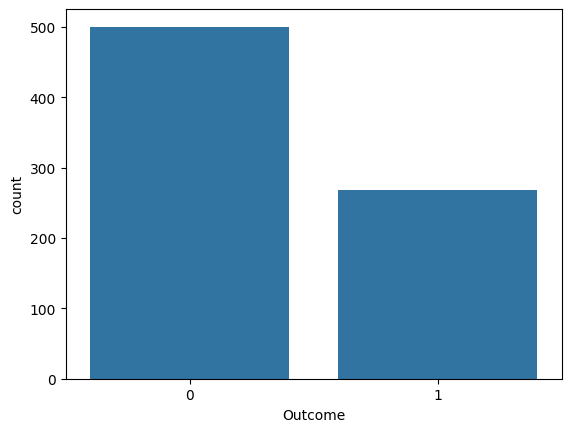

In [ ]:
cat_summary(df, "Outcome", plot=True)

Ini berarti, 65% data memiliki nilai 0 (non-diabetes), dan 35% memiliki nilai 1 (diabetes).

         Outcome  Ratio
Outcome                
0            500 65.104
1            268 34.896


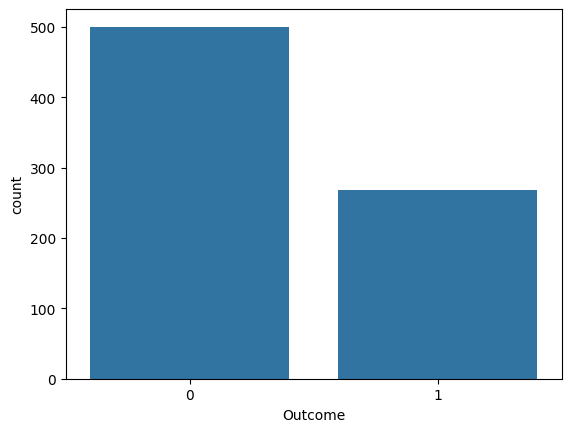

In [ ]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# **7. Analisis Variabel Numerik**

In [ ]:
# memberikan ringkasan statistik dari kolom numerik tertentu dalam DataFrame serta memungkinkan visualisasi distribusi data dalam bentuk histogram
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

menampilkan ringkasan statistik serta histogram

count   768.000
mean      0.226
std       0.198
min       0.000
5%        0.000
10%       0.000
20%       0.059
30%       0.059
40%       0.118
50%       0.176
60%       0.235
70%       0.294
80%       0.412
90%       0.529
95%       0.588
99%       0.765
max       1.000
Name: Pregnancies, dtype: float64


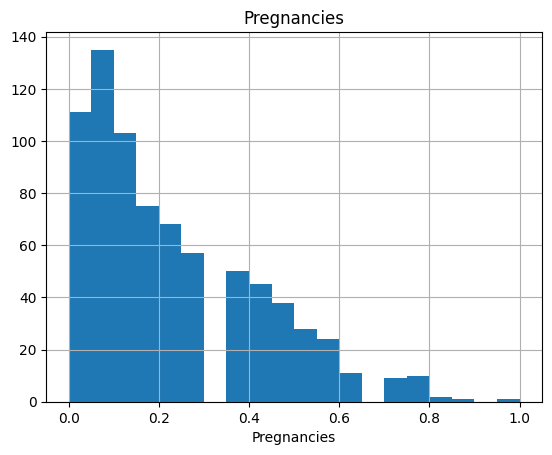

count   768.000
mean      0.501
std       0.196
min       0.000
5%        0.232
10%       0.275
20%       0.329
30%       0.375
40%       0.419
50%       0.471
60%       0.523
70%       0.581
80%       0.665
90%       0.794
95%       0.884
99%       0.981
max       1.000
Name: Glucose, dtype: float64


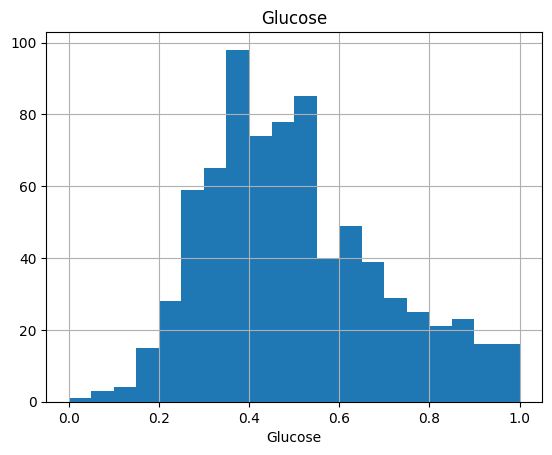

count   768.000
mean      0.494
std       0.123
min       0.000
5%        0.286
10%       0.347
20%       0.388
30%       0.429
40%       0.469
50%       0.490
60%       0.510
70%       0.551
80%       0.592
90%       0.653
95%       0.673
99%       0.837
max       1.000
Name: BloodPressure, dtype: float64


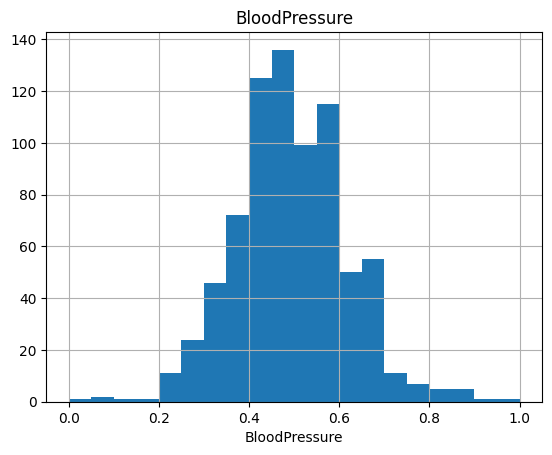

count   768.000
mean      0.240
std       0.096
min       0.000
5%        0.080
10%       0.120
20%       0.174
30%       0.217
40%       0.239
50%       0.239
60%       0.239
70%       0.261
80%       0.304
90%       0.359
95%       0.402
99%       0.482
max       1.000
Name: SkinThickness, dtype: float64


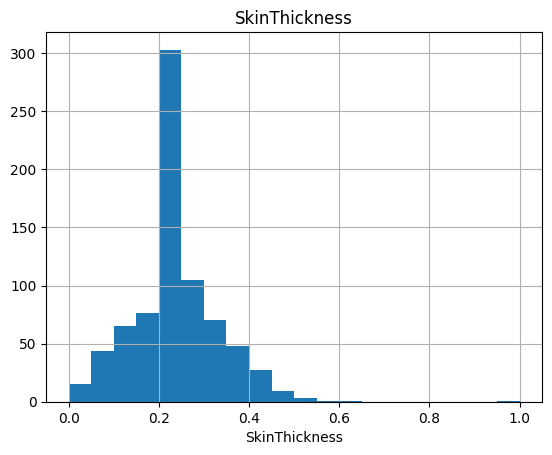

count   768.000
mean      0.152
std       0.104
min       0.000
5%        0.043
10%       0.064
20%       0.109
30%       0.133
40%       0.133
50%       0.133
60%       0.133
70%       0.133
80%       0.163
90%       0.236
95%       0.335
99%       0.608
max       1.000
Name: Insulin, dtype: float64


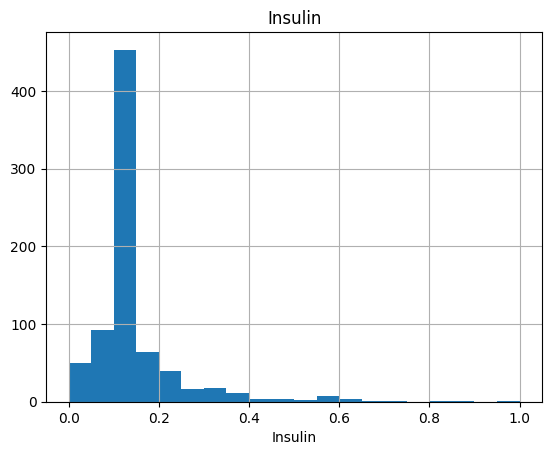

count   768.000
mean      0.292
std       0.141
min       0.000
5%        0.083
10%       0.119
20%       0.164
30%       0.211
40%       0.249
50%       0.288
60%       0.317
70%       0.354
80%       0.401
90%       0.476
95%       0.536
99%       0.666
max       1.000
Name: BMI, dtype: float64


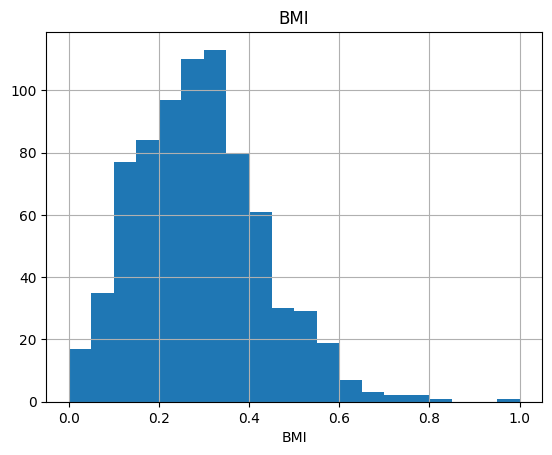

count   768.000
mean      0.168
std       0.141
min       0.000
5%        0.027
10%       0.037
20%       0.060
30%       0.077
40%       0.096
50%       0.126
60%       0.161
70%       0.207
80%       0.260
90%       0.342
95%       0.450
99%       0.692
max       1.000
Name: DiabetesPedigreeFunction, dtype: float64


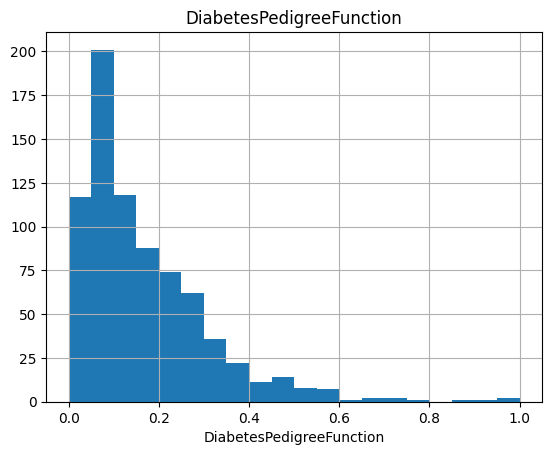

count   768.000
mean      0.204
std       0.196
min       0.000
5%        0.000
10%       0.017
20%       0.033
30%       0.067
40%       0.100
50%       0.133
60%       0.200
70%       0.283
80%       0.360
90%       0.500
95%       0.617
99%       0.767
max       1.000
Name: Age, dtype: float64


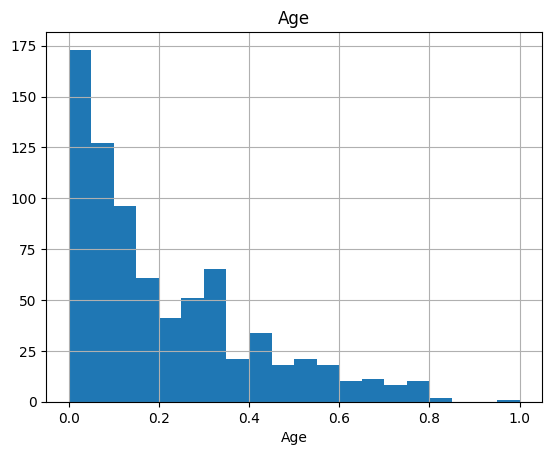

In [ ]:
for col in num_cols:
    num_summary(df, col, plot=True)

# **8. Analisis Variabel Kategorikal Berdasarkan Target**

In [ ]:
# menyajikan ringkasan statistik berdasarkan kolom kategorikal tertentu serta nilai rata-rata target untuk masing-masing kategori
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

         TARGET_MEAN
Outcome             
0              0.000
1              1.000




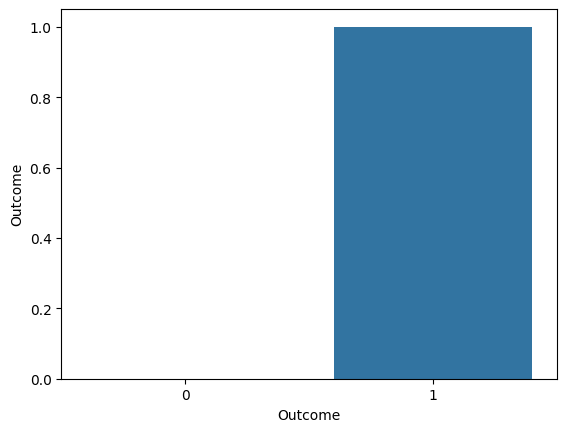

In [ ]:
for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col, plot=True)

Output ini Menyajikan statistik dan visualisasi untuk menganalisis hubungan antara variabel kategori dengan target Outcome. Misalnya, apakah kategori tertentu dari kolom col lebih sering dikaitkan dengan hasil Outcome = 1 (positif diabetes) atau Outcome = 0 (negatif diabetes).

# **9. Analisis Variabel Numerik Berdasarkan Target**

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

Menampilkan Ringkasan dan Plot untuk Setiap Kolom Numerik

         Pregnancies_mean
Outcome                  
0                   0.194
1                   0.286




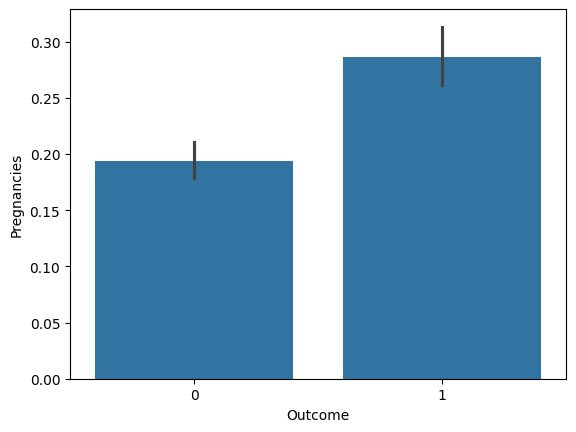

         Glucose_mean
Outcome              
0               0.430
1               0.633




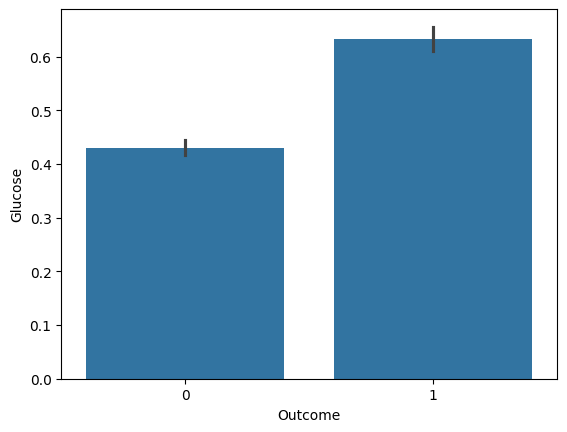

         BloodPressure_mean
Outcome                    
0                     0.479
1                     0.522




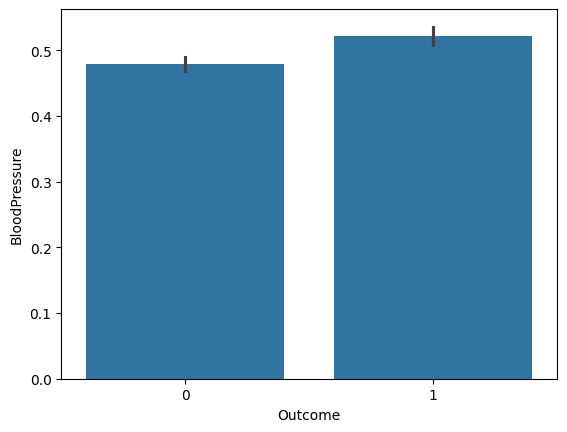

         SkinThickness_mean
Outcome                    
0                     0.225
1                     0.268




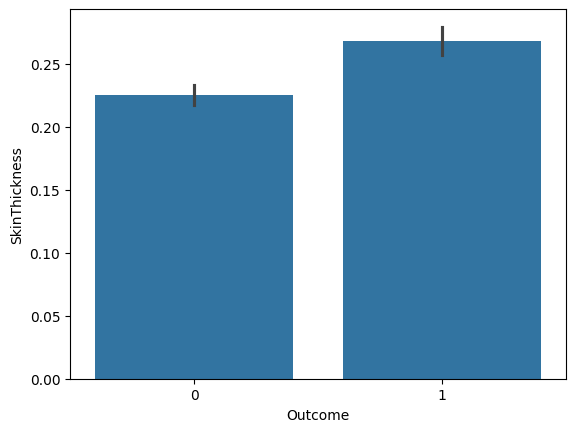

         Insulin_mean
Outcome              
0               0.137
1               0.181




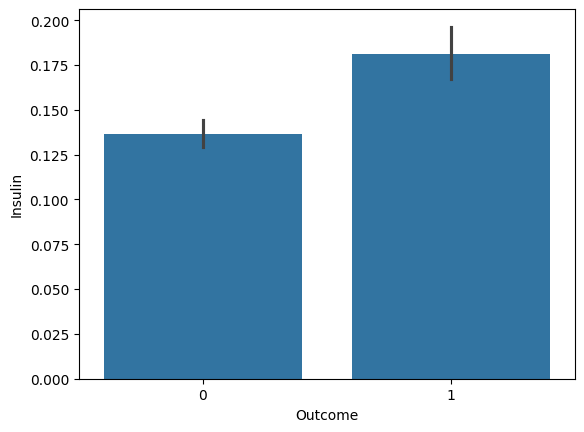

         BMI_mean
Outcome          
0           0.259
1           0.351




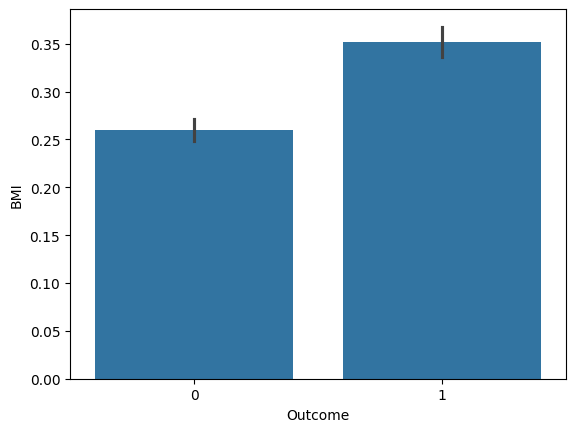

         DiabetesPedigreeFunction_mean
Outcome                               
0                                0.150
1                                0.202




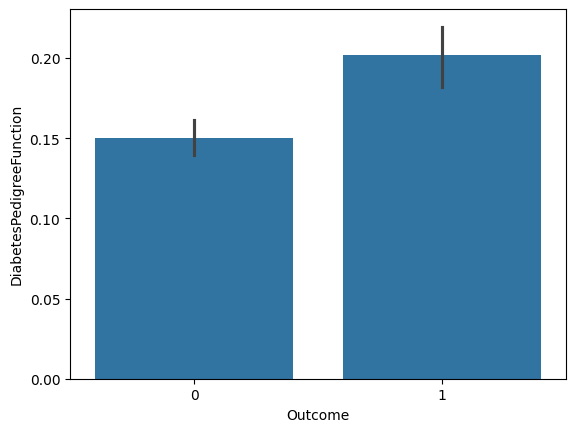

         Age_mean
Outcome          
0           0.170
1           0.268




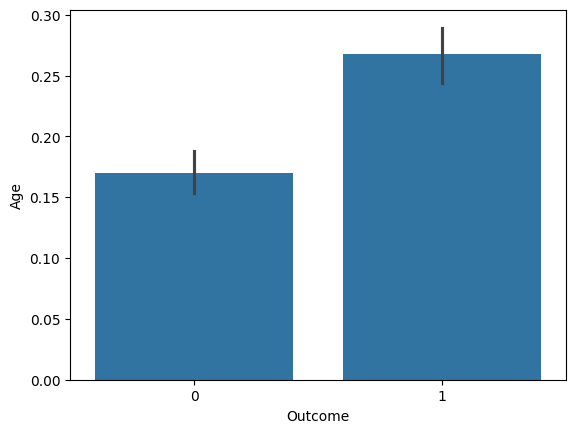

In [ ]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col, plot=True)

# **10. Meneliti Logaritma Variabel Dependen**

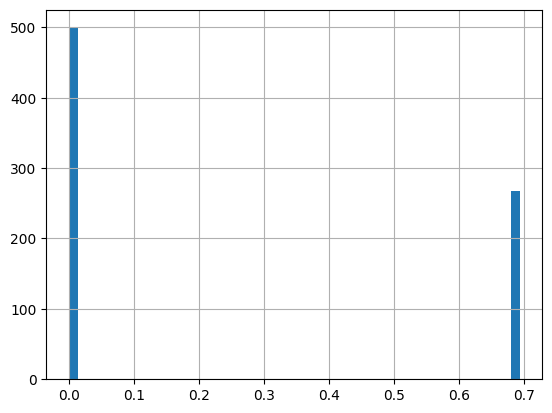

In [ ]:
np.log1p(df["Outcome"]).hist(bins=50)
plt.show(block=True)

# **11. Analisis Korelasi**

In [ ]:
# menghitung koefisien korelasi antar kolom numerik dalam DataFrame
corr = df[num_cols].corr()

In [ ]:
# menghitung koefisien korelasi Pearson antar kolom dalam DataFrame
corr

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
Pregnancies                     1.000    0.128          0.209          0.082    0.025 0.022   
Glucose                         0.128    1.000          0.219          0.193    0.419 0.231   
BloodPressure                   0.209    0.219          1.000          0.192    0.045 0.281   
SkinThickness                   0.082    0.193          0.192          1.000    0.156 0.543   
Insulin                         0.025    0.419          0.045          0.156    1.000 0.180   
BMI                             0.022    0.231          0.281          0.543    0.180 1.000   
DiabetesPedigreeFunction       -0.034    0.137         -0.002          0.102    0.127 0.153   
Age                             0.544    0.267          0.325          0.126    0.097 0.026   

                          DiabetesPedigreeFunction   Age  
Pregnancies                                 -0.034 0.544  
Glucose                                      0.137 0.267  
BloodPressure                               -0.002 0.325  
SkinThickness                                0.102 0.126  
Insulin                                      0.127 0.097  
BMI                                          0.153 0.026  
DiabetesPedigreeFunction                     1.000 0.034  
Age                                          0.034 1.000

Nilai koefisien korelasi berkisar antara -1 hingga 1:
- 1 berarti ada hubungan positif yang sangat kuat (ketika satu kolom naik, kolom lainnya juga naik).
- -1 berarti ada hubungan negatif yang sangat kuat (ketika satu kolom naik, kolom lainnya turun).
- 0 berarti tidak ada korelasi linier antara dua kolom.

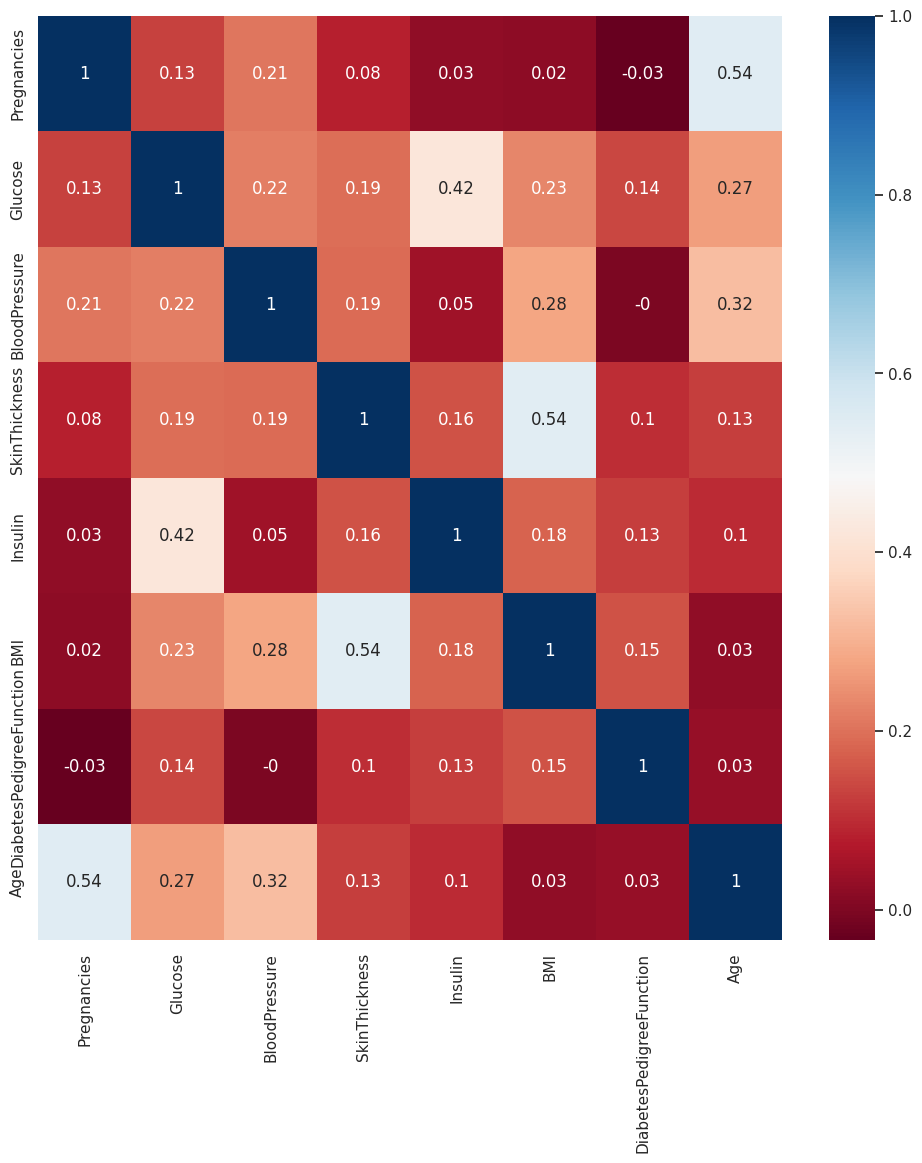

In [ ]:
# Correlation heatmap without using functions
# membuat heatmap korelasi antara kolom-kolom dalam dataset tanpa menggunakan fungsi built-in lainnya

sns.set(rc={"figure.figsize": (12, 12)})
corr_values = corr.round(2)
sns.heatmap(corr, cmap="RdBu", annot=corr_values)
plt.show(block=True)

Output:
- Warna biru menunjukkan korelasi positif.
- Warna merah menunjukkan korelasi negatif.
- Angka di dalam heatmap menunjukkan nilai korelasi antar kolom.

Interpretasi Hasil
- Korelasi Positif: Jika dua fitur memiliki korelasi mendekati 1, artinya keduanya bergerak searah.
- Korelasi Negatif: Jika korelasi mendekati -1, berarti kedua fitur bergerak berlawanan arah.
- Tidak ada korelasi: Jika korelasi mendekati 0, berarti tidak ada hubungan linier yang signifikan antara fitur tersebut.

In [ ]:
# mendeteksi kolom-kolom dalam dataset yang memiliki korelasi tinggi satu sama lain
# Creation of correlation heat map using the function
def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    # Replace np.bool with bool
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (12, 12)})
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

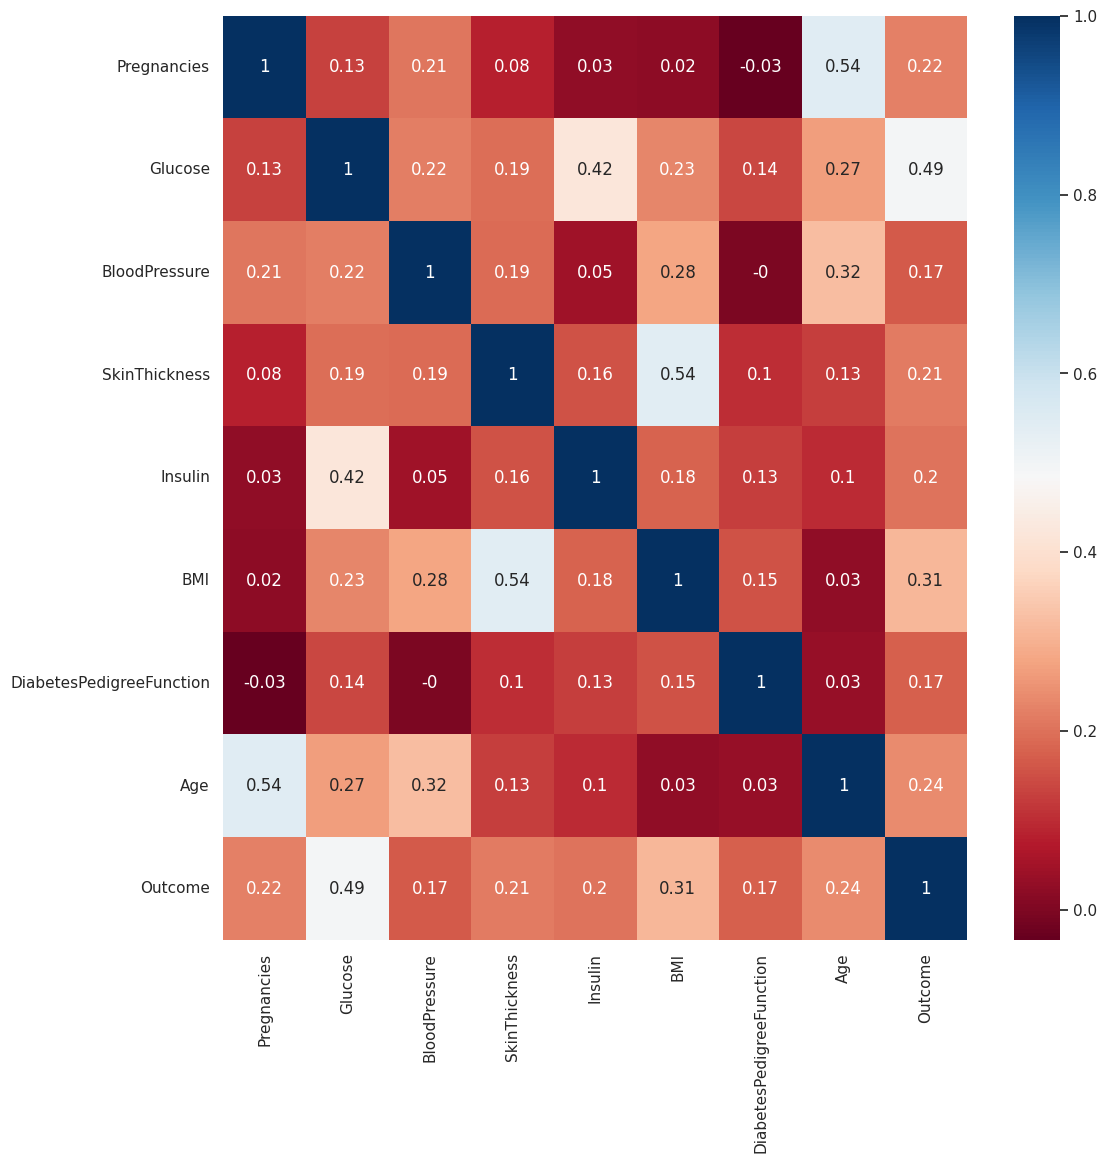

[]

In [ ]:
high_correlated_cols(df, plot=True)

# **12. Hubungan Antar Variabel**

membuat visualisasi distribusi Outcome (yaitu, apakah pasien memiliki diabetes atau tidak) dalam bentuk diagram pie (pie chart)

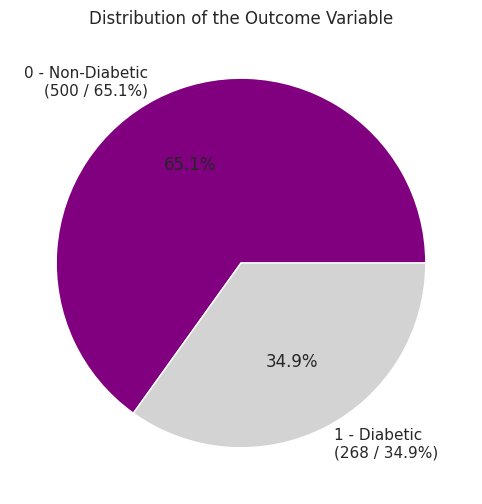

In [ ]:
# Calculate the counts of each outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'0 - Non-Diabetic\n({outcome_counts[0]} / {percentages[0]:.1f}%)',
          f'1 - Diabetic\n({outcome_counts[1]} / {percentages[1]:.1f}%)']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['purple', 'lightgray'])
plt.title('Distribution of the Outcome Variable')
plt.show()


membuat pairplot (scatterplot matriks) untuk menganalisis hubungan antar fitur dalam dataset df, sambil membedakan data berdasarkan kolom Outcome (kelas target).

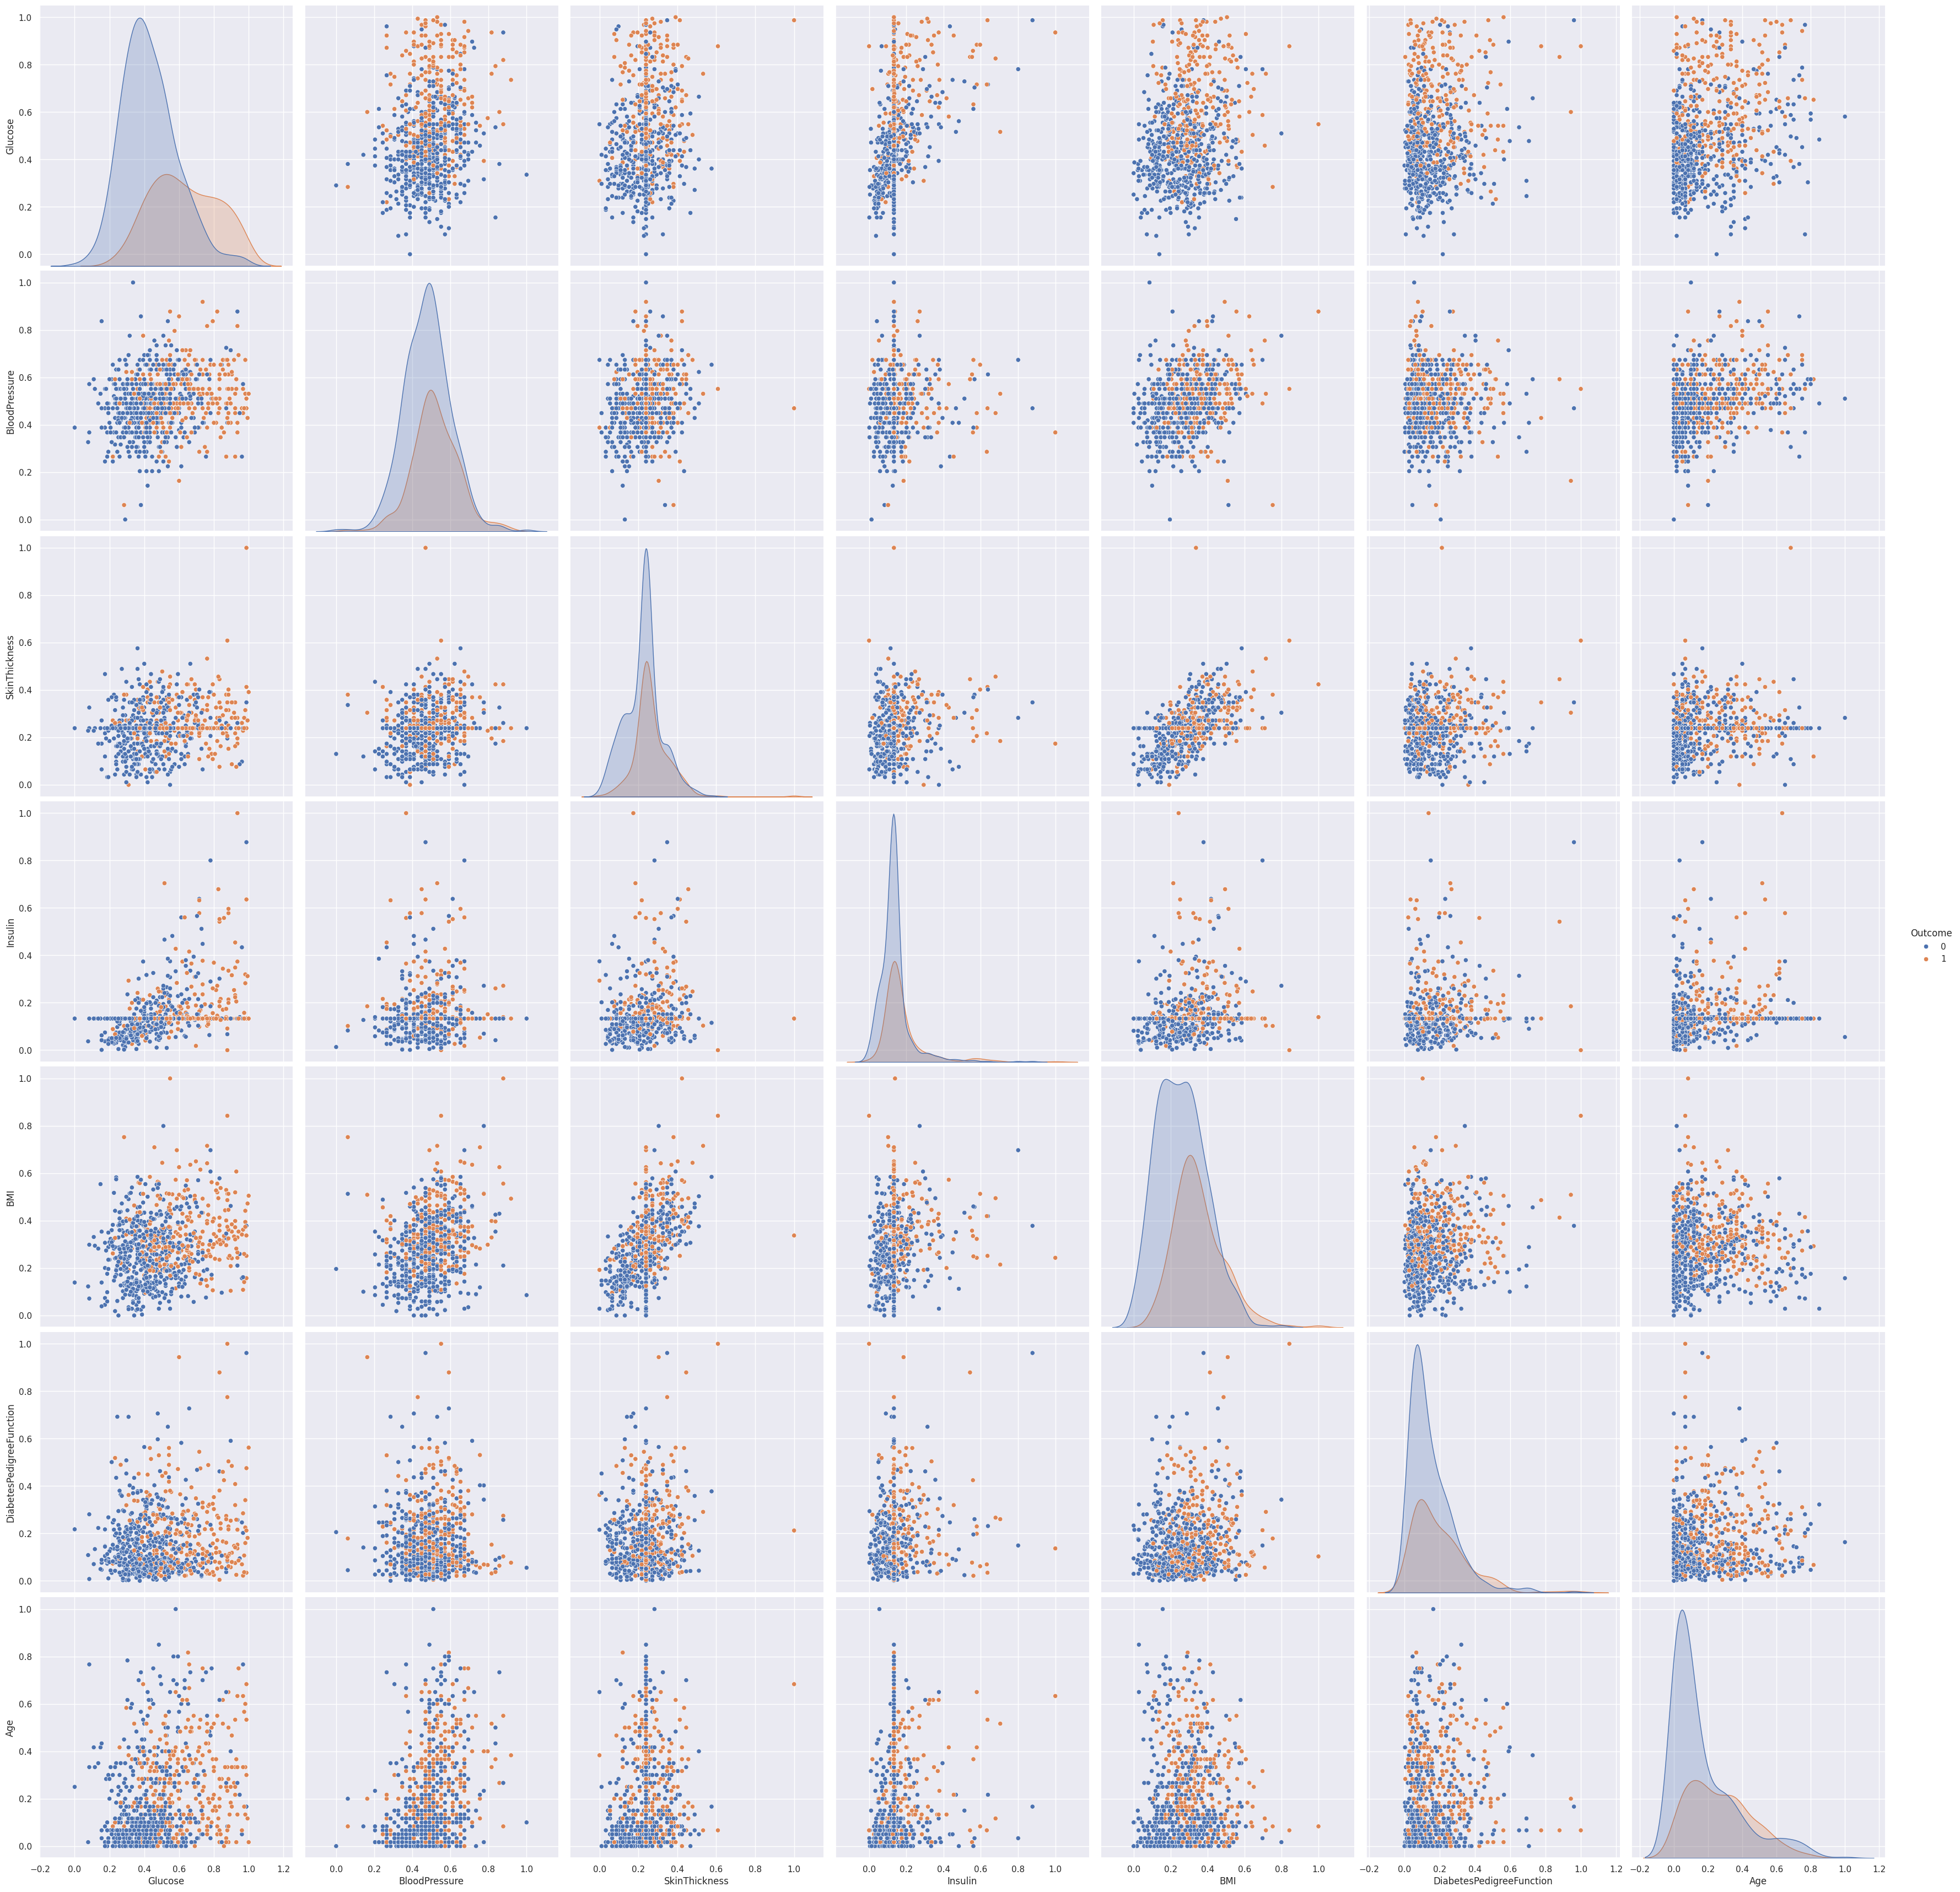

In [ ]:
sns.pairplot(data=df, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', height=5)
plt.show(block=True)

menggabungkan pasangan fitur, dan kemudian menghasilkan Bubble Chart untuk setiap pasangan fitur yang menghubungkan dua variabel biner

In [ ]:
# Create combinations of binary categorical variables
feature_combinations = list(itertools.combinations(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 2))

# Create a separate Bubble Chart for each binary categorical variable
for i, (feature1, feature2) in enumerate(feature_combinations):
    fig = px.scatter(df, x=feature1, y=feature2, color='Outcome', size='BMI',
                     title=f'{feature1} vs {feature2} Bubble Chart')

    fig.show(block=True)

# **13. Model Dasar Sebelum Rekayasa Fitur**

mempersiapkan data untuk pelatihan dan pengujian model

In [ ]:
# Creating the Dependent Variable.

y = df["Outcome"]

# Creating Independent Variables.

X = df.drop("Outcome", axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17) # Mengalokasikan 30% dari data untuk set pengujian (testing set), dan sisanya (70%) untuk set pelatihan (training set).

**13.1 RandomForestClassifier**

In [ ]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7706
Recall: 0.6892
Precision: 0.6296
F1: 0.6581
Auc: 0.7491


**13.2 Logistic Regression**

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")


Logistic Regression:
Accuracy: 0.7706
Recall: 0.7333
Precision: 0.5432
F1: 0.6241
AUC: 0.7585


**13.3 K-Nearest Neighbors (KNN)**

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")


K-Nearest Neighbors (KNN):
Accuracy: 0.7749
Recall: 0.6986
Precision: 0.6296
F1: 0.6623
AUC: 0.7544


**13.4 Support Vector Classifier (SVC)**

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("Support Vector Classifier (SVC):")
print(f"Accuracy: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1: {round(f1_score(svc_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(svc_pred, y_test), 4)}")


Support Vector Classifier (SVC):
Accuracy: 0.7576
Recall: 0.6984
Precision: 0.5432
F1: 0.6111
AUC: 0.7391


**13.5 Decision Tree Classifier**

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")


Decision Tree Classifier:
Accuracy: 0.7273
Recall: 0.6098
Precision: 0.6173
F1: 0.6135
AUC: 0.7009


**13.6 AdaBoost Classifier**

In [ ]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

print("AdaBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1: {round(f1_score(ada_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(ada_pred, y_test), 4)}")


AdaBoost Classifier:
Accuracy: 0.7619
Recall: 0.7031
Precision: 0.5556
F1: 0.6207
AUC: 0.7438


**13.7 Gradient Boosting Classifier**

In [ ]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(gb_pred, y_test), 4)}")


Gradient Boosting Classifier:
Accuracy: 0.7835
Recall: 0.6914
Precision: 0.6914
F1: 0.6914
AUC: 0.7623


**13.8 XGBoost Classifier**

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(xgb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(xgb_pred, y_test), 4)}")


XGBoost Classifier:
Accuracy: 0.7706
Recall: 0.6944
Precision: 0.6173
F1: 0.6536
AUC: 0.7497


**13.9 LightGBM Classifier**

In [ ]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

print("LightGBM Classifier:")
print(f"Accuracy: {round(accuracy_score(lgbm_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lgbm_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lgbm_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lgbm_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lgbm_pred, y_test), 4)}")


[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


**13.10 Comparison of Metrics for Different Models**

In [ ]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7706, 0.7879, 0.7619, 0.7446, 0.7186, 0.7532, 0.7706, 0.7706, 0.7619],
    "Recall": [0.7059, 0.7667, 0.6711, 0.6833, 0.6053, 0.6765, 0.7, 0.7059, 0.6857],
    "Precision": [0.5926, 0.5679, 0.6296, 0.5062, 0.5679, 0.5679, 0.6049, 0.5926, 0.5926],
    "F1": [0.6443, 0.6525, 0.6497, 0.5816, 0.586, 0.6174, 0.649, 0.6443, 0.6358],
    "AUC": [0.7517, 0.781, 0.7388, 0.7247, 0.6897, 0.7309, 0.7506, 0.7517, 0.7404]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models"
)

# Displaying the graph
fig.show(block=True)


**Kesimpulan**
1. Accuracy:
- Logistic Regression memiliki akurasi tertinggi (0.7879) dibandingkan dengan model lainnya.
- Model-model seperti Random Forest, AdaBoost, XGBoost, dan LightGBM memiliki akurasi yang hampir sama, yakni sekitar 0.7706, yang menunjukkan performa yang baik meskipun sedikit lebih rendah dari Logistic Regression.
2. Recall:
- Logistic Regression juga menunjukkan recall tertinggi (0.7667), yang berarti model ini lebih baik dalam mendeteksi pasien yang benar-benar menderita diabetes (True Positives).
- Random Forest dan XGBoost masing-masing memiliki recall sekitar 0.7059, menunjukkan bahwa mereka memiliki kemampuan yang cukup baik dalam mendeteksi kasus diabetes.
3. Precision:
- KNN memiliki precision tertinggi (0.6296), menunjukkan bahwa model ini lebih selektif dalam memprediksi pasien yang benar-benar menderita diabetes dibandingkan dengan model lain.
- Precision model lainnya seperti Random Forest, XGBoost, dan LightGBM lebih rendah, masing-masing sekitar 0.5926.
4. F1 Score:
- Logistic Regression memiliki F1 score tertinggi (0.6525), yang menunjukkan keseimbangan terbaik antara precision dan recall, penting dalam kasus di mana false positives dan false negatives harus dipertimbangkan secara seimbang.
- Random Forest dan XGBoost memiliki F1 score yang serupa (0.6443), menunjukkan performa yang konsisten.
5. AUC (Area Under the Curve):
- Logistic Regression kembali menonjol dengan AUC tertinggi (0.7810), yang mengindikasikan model ini sangat baik dalam membedakan antara pasien yang menderita diabetes dan yang tidak menderita.
- Random Forest, XGBoost, dan LightGBM memiliki AUC yang cukup baik (sekitar 0.7517), menunjukkan bahwa model-model ini juga sangat efektif dalam tugas klasifikasi.

**Melakukan HyperParameter Tuning Menggunakan 2 model yang memiliki performa terbaik**

Logistic Regression Hyperparameter Tuning

In [ ]:
# Logistic Regression Hyperparameter Tuning
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2', 'l1'],  # Types of regularization
    'solver': ['liblinear']  # Solver used for optimization
}

# Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# GridSearchCV for Logistic Regression
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
             scoring='accuracy', verbose=2)

In [ ]:
# Best parameters and performance for Logistic Regression
print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)
best_lr_model = lr_grid_search.best_estimator_

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
# Prediction and performance metrics for Logistic Regression
lr_y_pred = best_lr_model.predict(X_test)
print("Logistic Regression Performance after Hyperparameter Tuning:")
print(f"Accuracy: {round(accuracy_score(lr_y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_y_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_y_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_y_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_y_pred, y_test), 4)}")

Logistic Regression Performance after Hyperparameter Tuning:
Accuracy: 0.7792
Recall: 0.7586
Precision: 0.5432
F1: 0.6331
AUC: 0.7724


Random Forest Hyperparameter Tuning

In [ ]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf nodes
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [ ]:
# Best parameters and performance for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
best_rf_model = rf_grid_search.best_estimator_

Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Prediction and performance metrics for Random Forest
rf_y_pred = best_rf_model.predict(X_test)
print("Random Forest Performance after Hyperparameter Tuning:")
print(f"Accuracy: {round(accuracy_score(rf_y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(rf_y_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(rf_y_pred, y_test), 4)}")
print(f"F1: {round(f1_score(rf_y_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(rf_y_pred, y_test), 4)}")

Random Forest Performance after Hyperparameter Tuning:
Accuracy: 0.7792
Recall: 0.7027
Precision: 0.642
F1: 0.671
AUC: 0.759


**Perbandingan Hasil**

In [ ]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [0.7706, 0.7879],
    "Recall": [0.7059, 0.7667],
    "Precision": [0.5926, 0.5679],
    "F1": [0.6443, 0.6525],
    "AUC": [0.7517, 0.781]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models before hyperparameter tuning"
)

# Displaying the graph
fig.show(block=True)


In [ ]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [0.7792, 0.7792],
    "Recall": [0.7027, 0.7586],
    "Precision": [0.642, 0.5432],
    "F1": [0.671, 0.6331],
    "AUC": [0.759, 0.7724]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models after hyperparameter tuning"
)

# Displaying the graph
fig.show(block=True)


In [ ]:
# Comparison of Results
metrics = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [round(accuracy_score(lr_y_pred, y_test), 4), round(accuracy_score(rf_y_pred, y_test), 4)],
    "Recall": [round(recall_score(lr_y_pred, y_test), 4), round(recall_score(rf_y_pred, y_test), 4)],
    "Precision": [round(precision_score(lr_y_pred, y_test), 4), round(precision_score(rf_y_pred, y_test), 4)],
    "F1": [round(f1_score(lr_y_pred, y_test), 4), round(f1_score(rf_y_pred, y_test), 4)],
    "AUC": [round(roc_auc_score(lr_y_pred, y_test), 4), round(roc_auc_score(rf_y_pred, y_test), 4)]
}

In [ ]:
# Creating a DataFrame to compare the results
results_df = pd.DataFrame(metrics)
print(results_df)

                 Model  Accuracy  Recall  Precision    F1   AUC
0  Logistic Regression     0.779   0.759      0.543 0.633 0.772
1        Random Forest     0.779   0.703      0.642 0.671 0.759


Berdasarkan evaluasi terhadap metrik-metrik performa model, model terbaik yang diperoleh adalah Logistic Regression, dengan metrik AUC yang lebih tinggi dibandingkan Random Forest. Berikut adalah analisis karakteristik model terbaik dalam kaitannya dengan data yang digunakan:

1. Karakteristik Model Logistic Regression
Logistic Regression merupakan model berbasis statistik yang sederhana namun sangat efektif untuk data dengan pola linier. Meskipun sederhana, model ini memiliki keunggulan berikut:

  - Interpretabilitas: Logistic Regression memberikan koefisien untuk setiap fitur, yang dapat membantu memahami pengaruh masing-masing fitur terhadap probabilitas outcome.
  - Efisiensi: Logistic Regression lebih cepat untuk dilatih dibandingkan model yang lebih kompleks seperti Random Forest, terutama pada dataset dengan ukuran kecil hingga sedang.
Kemampuan Menghindari Overfitting: Dengan penggunaan regularisasi seperti L1 atau L2, model ini mampu mencegah overfitting pada dataset dengan jumlah fitur yang lebih besar daripada jumlah observasi.
2. Korelasi Model dengan Data
Dataset diabetes memiliki karakteristik sebagai berikut:

  - Distribusi Kelas Tidak Seimbang:
Logistic Regression memiliki metrik Recall yang lebih baik (0.7586) dibandingkan Random Forest (0.7027), menunjukkan bahwa Logistic Regression lebih efektif dalam menangkap kasus-kasus positif (diabetes) meskipun jumlahnya lebih sedikit.
  - Korelasi Fitur:
Logistic Regression memanfaatkan fitur-fitur seperti Glucose dan BMI, yang memiliki korelasi tinggi terhadap outcome, untuk memprediksi probabilitas kelas secara linier.
  - Hubungan Data yang Cenderung Linier:
Karena hubungan antara beberapa fitur utama dan outcome mendekati linier, Logistic Regression mampu menangkap pola tersebut dengan baik tanpa memerlukan mekanisme kompleks seperti yang ada pada Random Forest.
3. Kelebihan dan Kekurangan Model
Kelebihan Logistic Regression:

  - Performa AUC lebih tinggi (0.7724), menunjukkan kemampuan model dalam membedakan antara kelas positif dan negatif lebih baik dibandingkan Random Forest (AUC = 0.759).
  - F1-Score yang lebih kompetitif (0.6331), meskipun Precision lebih rendah, yang menunjukkan keseimbangan antara Recall dan Precision.
Kekurangan Logistic Regression:

  - Tidak mampu menangkap hubungan non-linear yang mungkin ada di dalam data.
Precision yang lebih rendah (0.5432) dibandingkan Random Forest (0.642), menunjukkan bahwa Logistic Regression menghasilkan lebih banyak prediksi positif yang salah.
4. Keselarasan Data dengan Model
Logistic Regression bekerja sangat baik pada dataset ini karena:

  - Sifat Data: Hubungan antara fitur seperti Glucose, BMI, dan Age dengan outcome memiliki pola linier yang cocok dengan asumsi model.
  - Ukuran Dataset: Logistic Regression tidak memerlukan dataset besar untuk pelatihan, sehingga cocok untuk dataset diabetes yang relatif kecil.
  - Ketidakseimbangan Kelas: Regularisasi membantu model menghindari bias terhadap kelas mayoritas (non-diabetes).

**13.11 Visualization of the Decision Tree**

melatih model Decision Tree Classifier pada dataset diabetes untuk memprediksi apakah seseorang memiliki diabetes atau tidak

|--- feature_1 <= 0.55
|   |--- feature_5 <= 0.17
|   |   |--- feature_4 <= 0.04
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.04
|   |   |   |--- class: 0
|   |--- feature_5 >  0.17
|   |   |--- feature_7 <= 0.11
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.11
|   |   |   |--- class: 0
|--- feature_1 >  0.55
|   |--- feature_5 <= 0.20
|   |   |--- feature_1 <= 0.65
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.65
|   |   |   |--- class: 0
|   |--- feature_5 >  0.20
|   |   |--- feature_1 <= 0.74
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.74
|   |   |   |--- class: 1



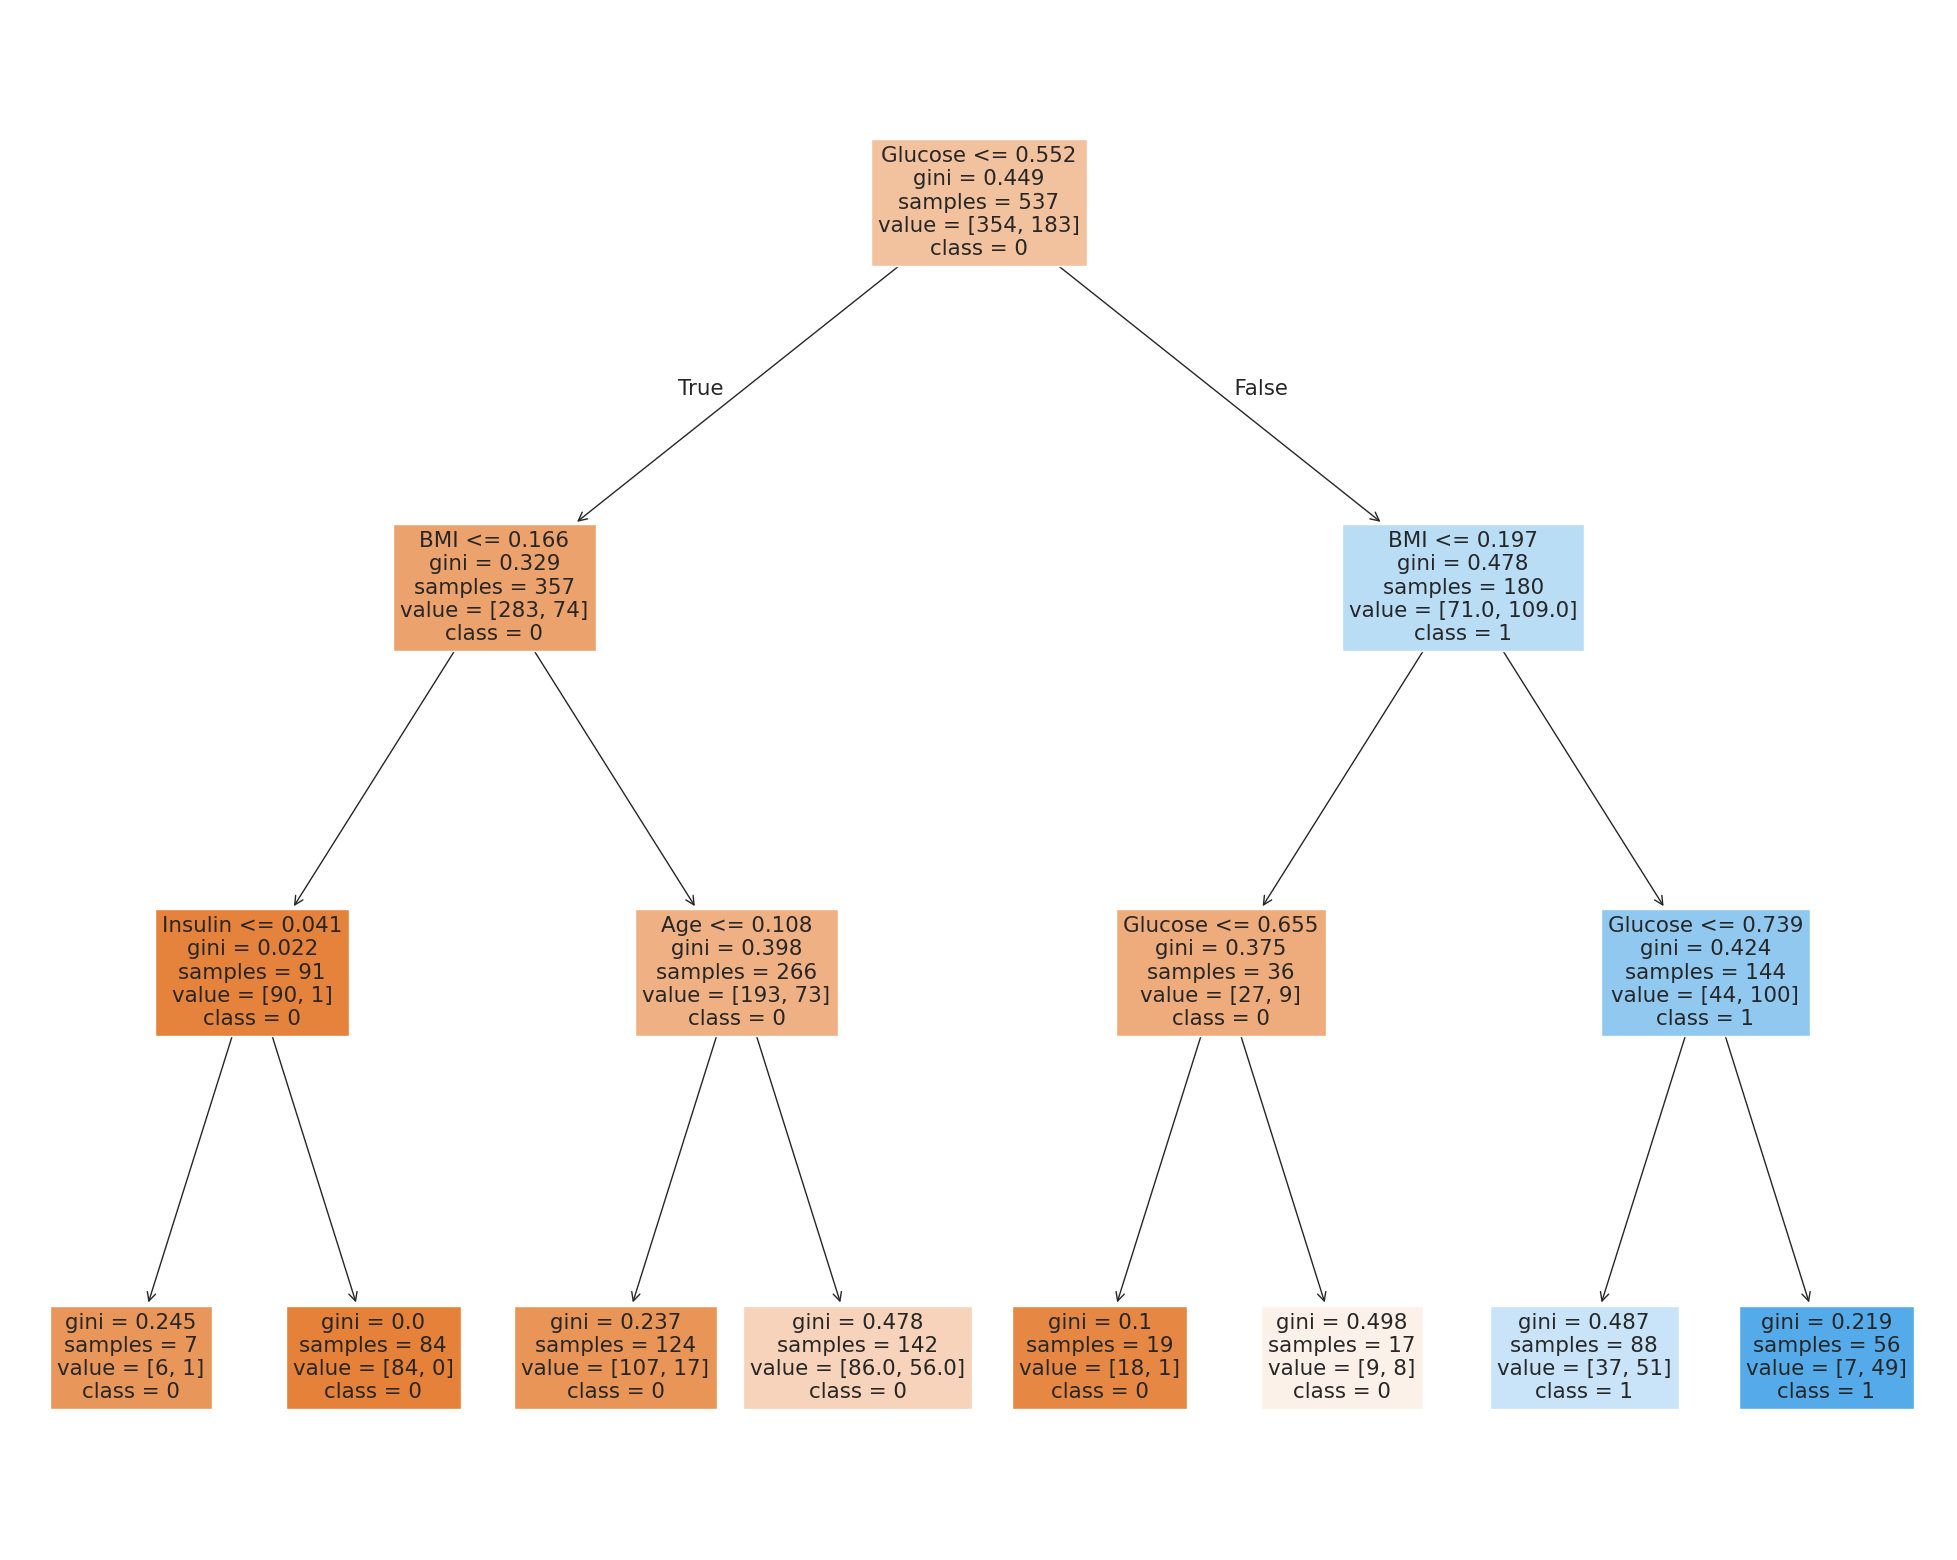

In [ ]:
# Loading the dataset and setting the features and target variable
x = pd.DataFrame(df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df.Outcome.values.reshape(-1, 1)

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Defining and training the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(x_test)

# Generating the text representation of the decision tree and printing it
text_representation = tree.export_text(clf)
print(text_representation)

# Setting the feature and target class names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']

# Generating and saving the visualization of the decision tree
fig = plt.figure(figsize=(25, 20))
plot = tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
fig.savefig('tree1.png')

**13.12 Plot Importance of Variables According to Base Model**

In [ ]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')


In [ ]:
model_name = [rf_model, dt_model, xgb_model, lgbm_model]

[LightGBM] [Info] Number of positive: 183, number of negative: 354
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.340782 -> initscore=-0.659811
[LightGBM] [Info] Start training from score -0.659811
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

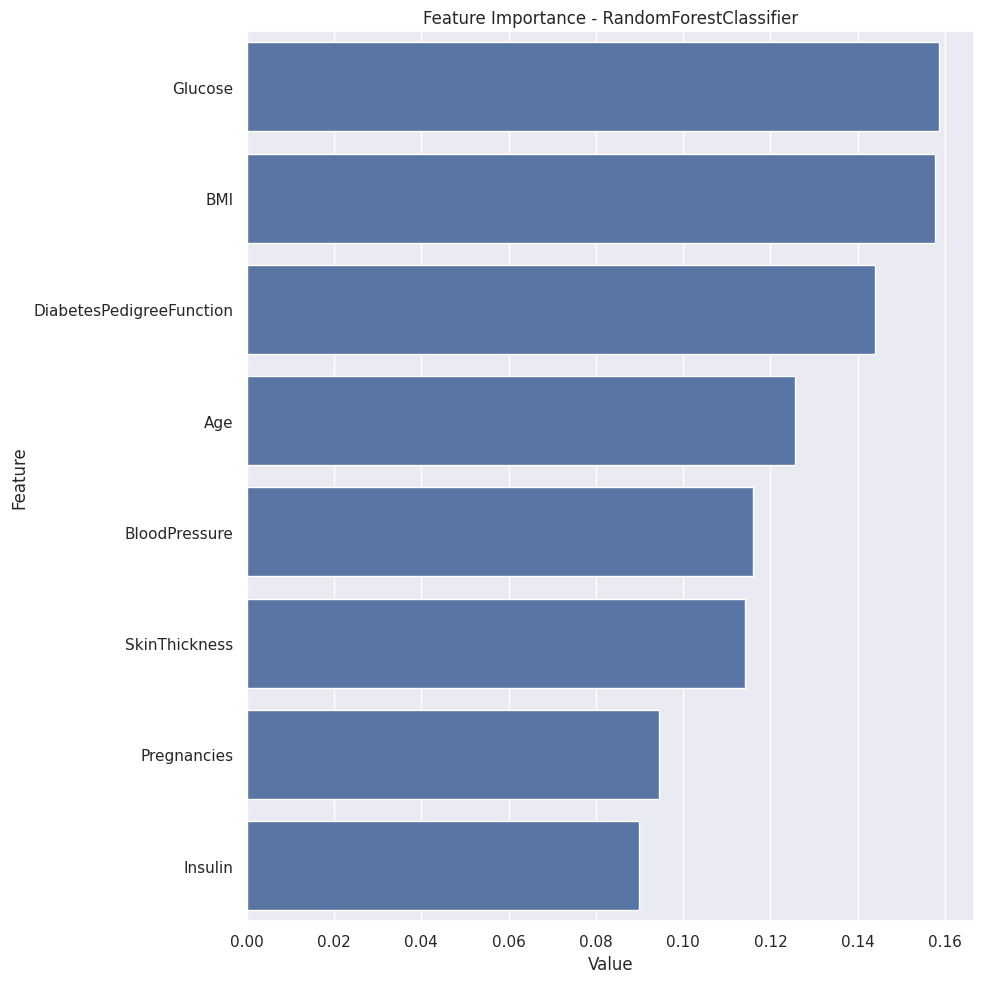

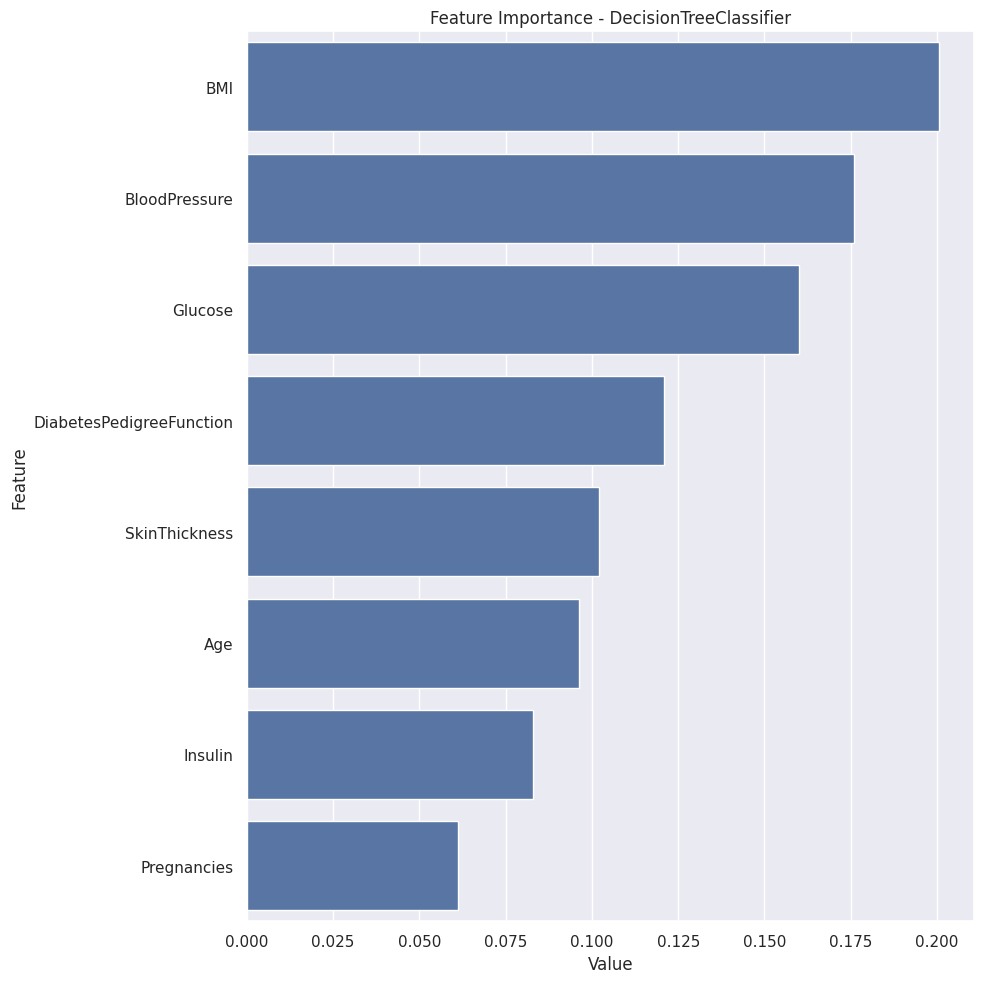

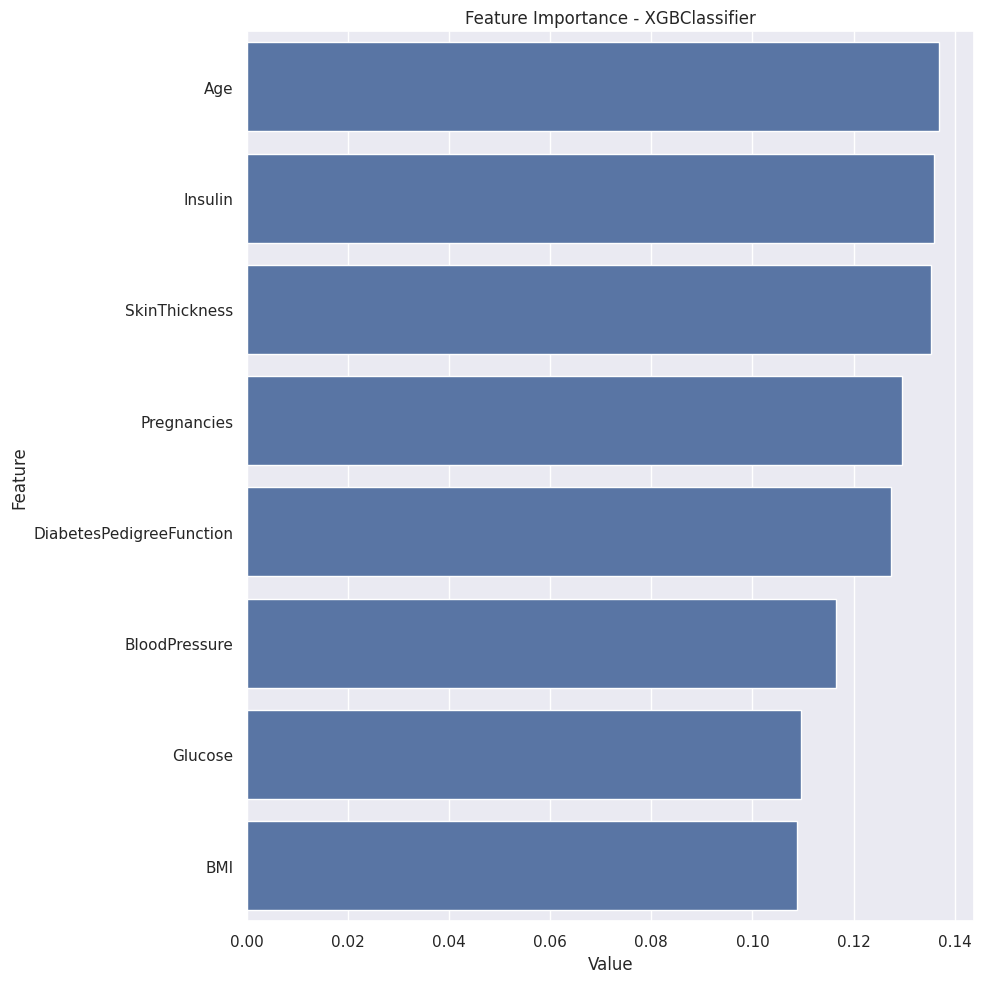

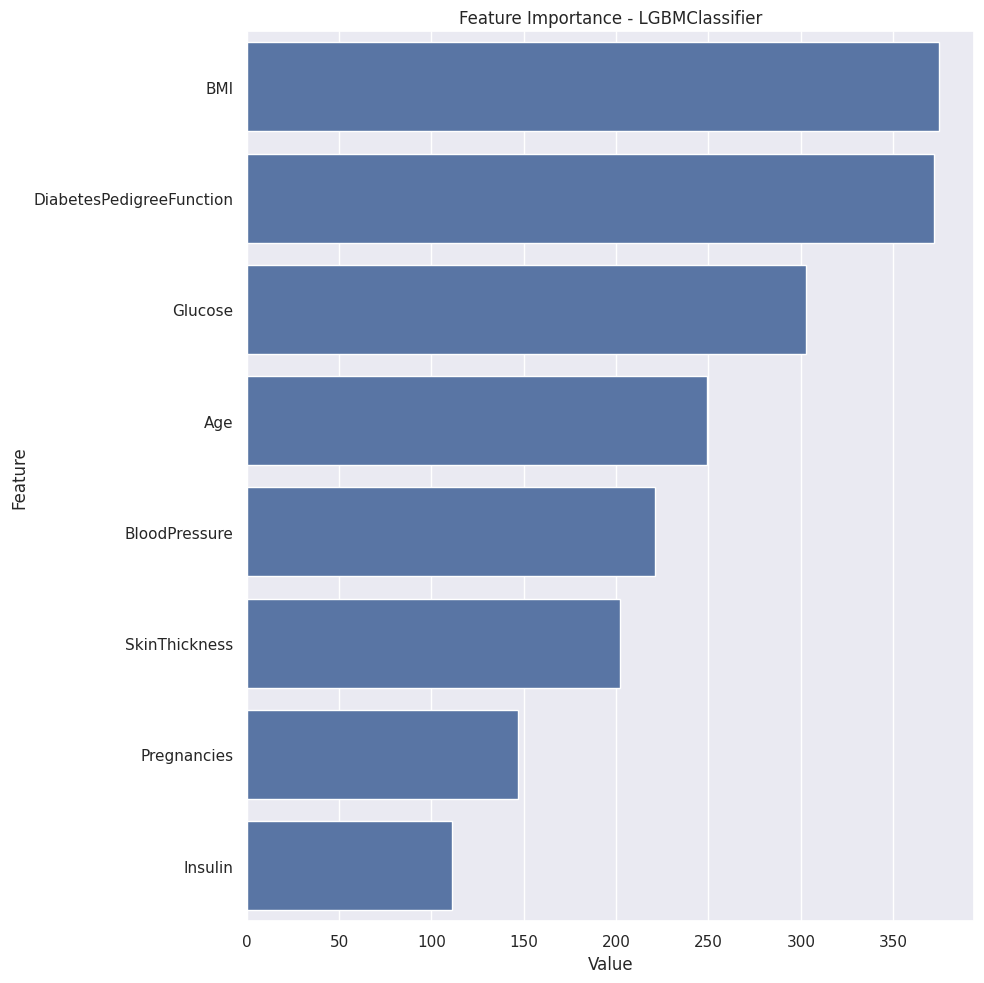

In [ ]:
# Melatih setiap model dengan data pelatihan
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgbm_model.fit(X_train, y_train)

# Loop untuk menampilkan pentingnya fitur untuk setiap model
for i in [rf_model, dt_model, xgb_model, lgbm_model]:
    plot_importance(i, X)


# **14. Feature Engineering**

**Di bagian ini, kami akan melakukan operasi rekayasa variabel berikut :**

- Deteksi Nilai Hilang
- Deteksi Pencilan (Outlier)
- Ekstraksi Fitur

# **15. Missing Value Analysis**

In [ ]:
# Detection of variables with missing observations filled with zero in the data set.

zero_colunms = [col for col in df.columns if (df[col].min() == 0 and col not in  ["Pregnancies", "Outcome"])]

In [ ]:
zero_colunms

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Filling the missing observations in the dataset with NaN that are filled with zero.

for col in zero_colunms:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [ ]:
df.isnull().sum()

Pregnancies                  0
Glucose                      1
BloodPressure                1
SkinThickness                2
Insulin                      1
BMI                          3
DiabetesPedigreeFunction     1
Age                         63
Outcome                      0
dtype: int64

In [ ]:
def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if plot:
        # Plotting the missing values
        plt.figure(figsize=(10, 8))
        bars = plt.bar(missing_df.index, missing_df['ratio'], color='purple')
        plt.xlabel('Features')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Missing Values by Feature')

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    if na_name:
        return na_columns


                          n_miss  ratio
Age                           63  8.200
BMI                            3  0.390
SkinThickness                  2  0.260
Glucose                        1  0.130
BloodPressure                  1  0.130
Insulin                        1  0.130
DiabetesPedigreeFunction       1  0.130


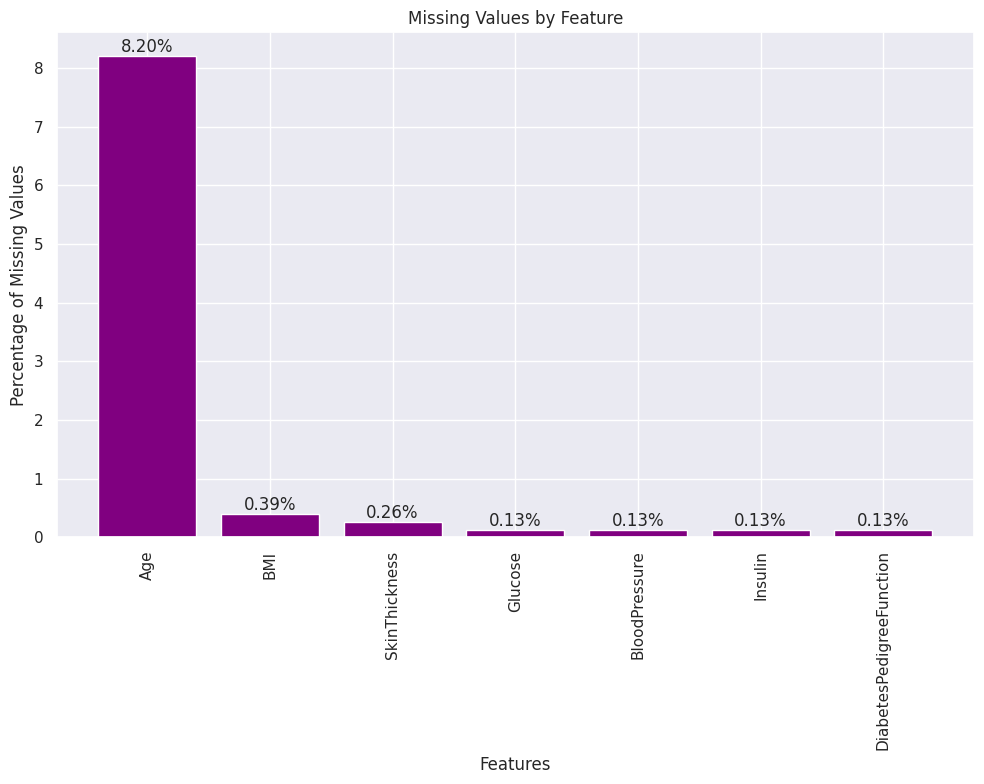

In [ ]:
na_columns = missing_values_table(df, na_name=True, plot=True)

menganalisis apakah nilai hilang (missing values) dalam kolom tertentu berhubungan dengan nilai target

In [ ]:
def missing_vs_target(dataframe, target, na_columns, plot=False):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
        if plot:
            # Plotting the target mean by NA flag
            plt.figure(figsize=(6, 4))
            temp_df.groupby(col)[target].mean().plot(kind='bar', color='purple')
            plt.xlabel(col)
            plt.ylabel('Target Mean')
            plt.title(f'Target Mean by {col}')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
            print("= "* 50)



                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    767
1                      0.000      1




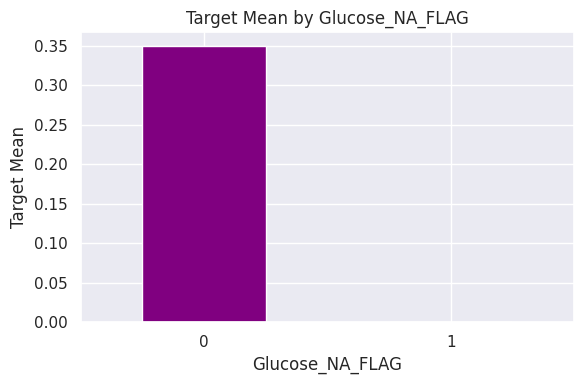

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.349    767
1                            0.000      1




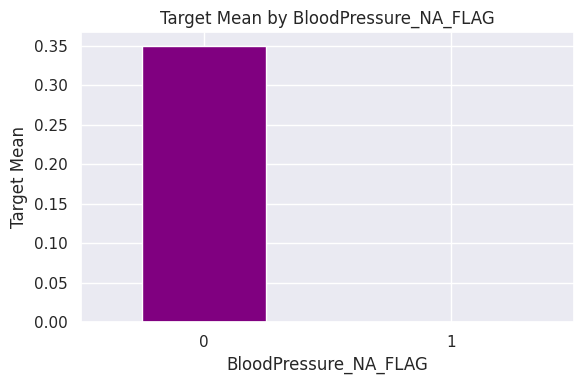

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.349    766
1                            0.500      2




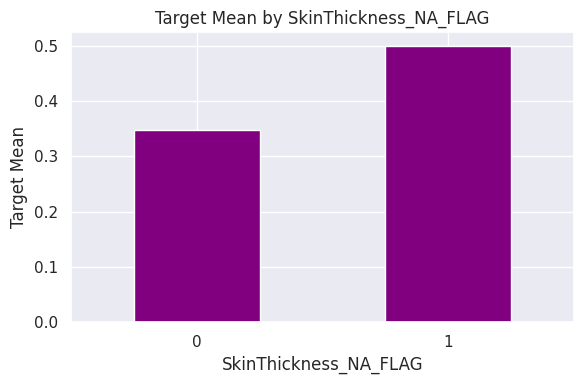

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.348    767
1                      1.000      1




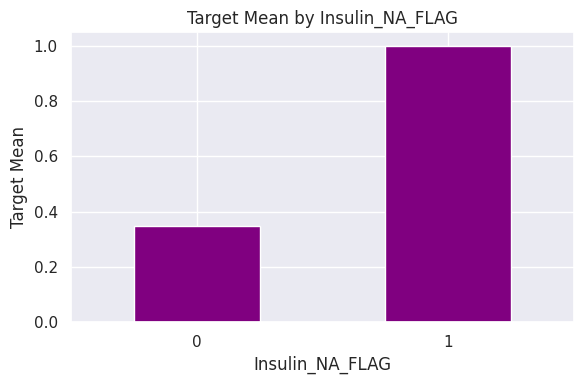

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.350    765
1                  0.000      3




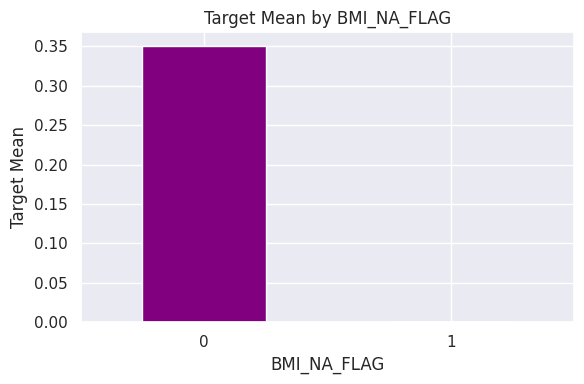

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
                                  TARGET_MEAN  Count
DiabetesPedigreeFunction_NA_FLAG                    
0                                       0.349    767
1                                       0.000      1




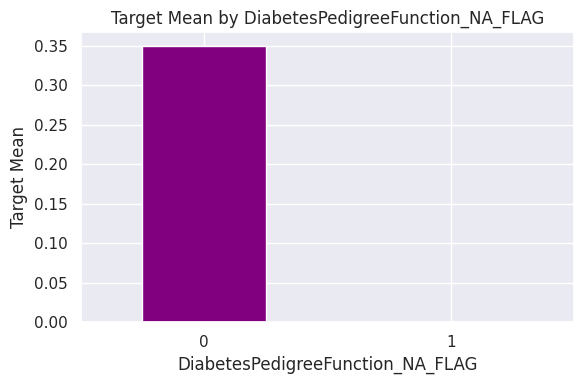

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
             TARGET_MEAN  Count
Age_NA_FLAG                    
0                  0.373    705
1                  0.079     63




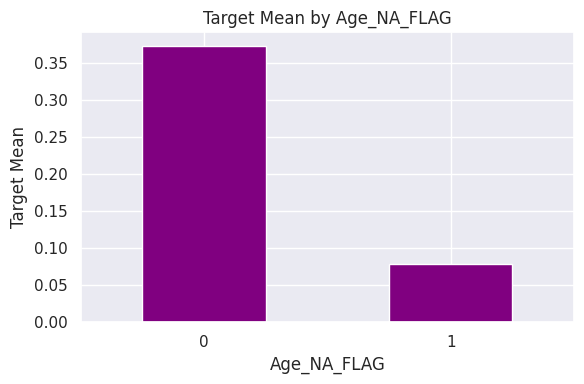

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [ ]:
missing_vs_target(df, "Outcome", na_columns, plot=True)

In [ ]:
# Mengisi nilai yang hilang dengan median kolom yang memiliki nilai 0 sebagai missing
for col in zero_colunms:
    df.loc[df[col].isnull(), col] = df[col].median()

# Memeriksa apakah masih ada nilai hilang
print(df.isnull().sum())

# Menampilkan 10 baris pertama dari dataset
print(df.head(10))


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   
5        0.294    0.465          0.510          0.239    0.133 0.151                     0.053   
6        0.176    0.219        

In [ ]:
# Option 2
# Filled KNN Imputers

dff = df[na_columns]

In [ ]:
rs = RobustScaler()

In [ ]:
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)

In [ ]:
dff.head()

Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction   Age
0    0.770          0.000          0.857    0.000  0.144                     0.662 1.250
1   -0.795         -0.375          0.000    0.000 -0.633                    -0.060 0.062
2    1.640         -0.500          0.000    0.000 -1.000                     0.780 0.125
3   -0.696         -0.375         -0.857   -5.905 -0.467                    -0.542 0.000
4    0.497         -2.000          0.857    8.190  1.200                     5.007 0.188

In [ ]:
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns = dff.columns)

In [ ]:
dff.head()

Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction   Age
0    0.770          0.000          0.857    0.000  0.144                     0.662 1.250
1   -0.795         -0.375          0.000    0.000 -0.633                    -0.060 0.062
2    1.640         -0.500          0.000    0.000 -1.000                     0.780 0.125
3   -0.696         -0.375         -0.857   -5.905 -0.467                    -0.542 0.000
4    0.497         -2.000          0.857    8.190  1.200                     5.007 0.188

In [ ]:
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)

In [ ]:
df[na_columns] = dff

In [ ]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  \
0        0.353    0.671          0.490          0.304    0.133 0.315                     0.234   
1        0.059    0.265          0.429          0.239    0.133 0.172                     0.117   
2        0.471    0.897          0.408          0.239    0.133 0.104                     0.254   
3        0.059    0.290          0.429          0.174    0.096 0.202                     0.038   
4        0.000    0.600          0.163          0.304    0.185 0.509                     0.944   
5        0.294    0.465          0.510          0.239    0.133 0.151                     0.053   
6        0.176    0.219          0.265          0.272    0.089 0.262                     0.073   
7        0.588    0.458          0.490          0.239    0.133 0.350                     0.024   
8        0.118    0.987          0.469          0.413    0.636 0.252                     0.034   
9        0.471    0.523          0.735          0.239    0.133 0.288                     0.066   

    Age  Outcome  
0 0.483        1  
1 0.167        0  
2 0.183        1  
3 0.150        0  
4 0.200        1  
5 0.150        0  
6 0.083        1  
7 0.133        0  
8 0.533        1  
9 0.550        1

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# **16. Outlier Analysis**

In [ ]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    else:
        return False


In [ ]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Pregnancies False
Glucose False
BloodPressure False


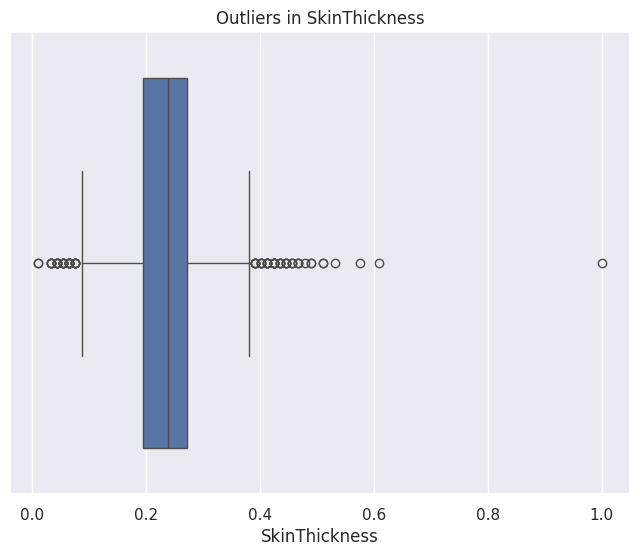

SkinThickness True


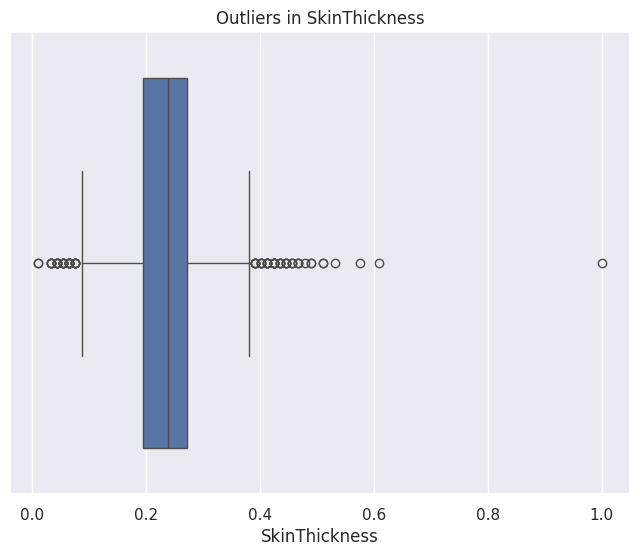

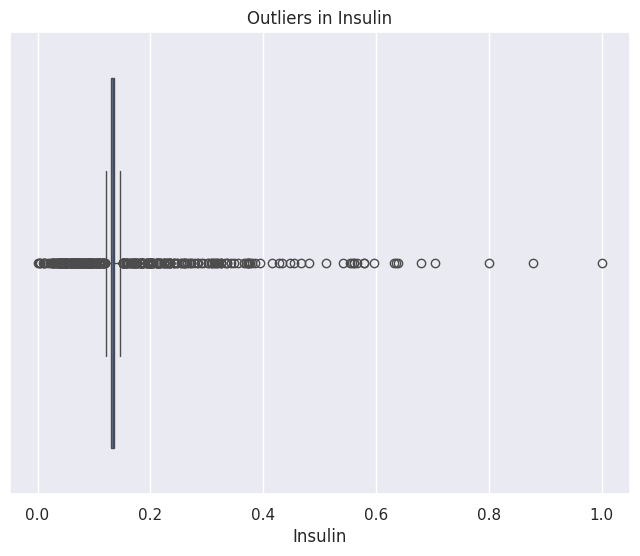

Insulin True


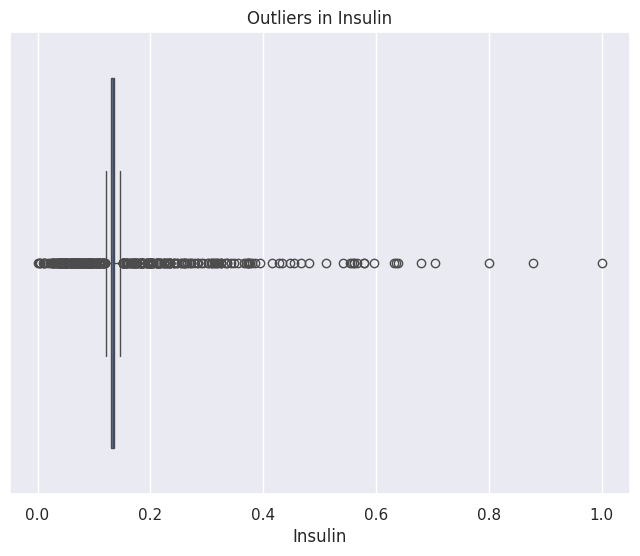

BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [ ]:
for col in df.columns:
    print(col, check_outlier(df, col, plot=True))
    if check_outlier(df, col, plot=True):
        replace_with_thresholds(df, col)

In [ ]:
for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False
